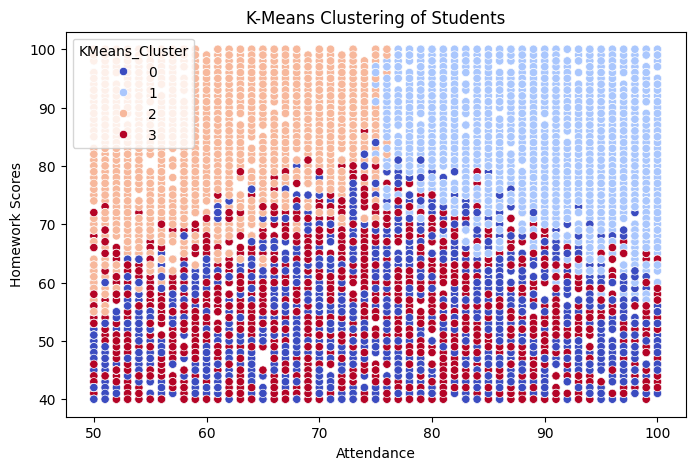

Ridge Regression MAE: 17.358
Ridge Regression R2 Score: -0.001
XGBoost MAE: 17.640
XGBoost R2 Score: -0.045
Random Forest MAE: 17.678
Random Forest R2 Score: -0.052
Cluster 0: Attendance Avg: 76.4, Homework Avg: 55.2, Participation Avg: 77.5
  -> Recommendation: Maintain good academic habits.
Cluster 1: Attendance Avg: 89.2, Homework Avg: 84.3, Participation Avg: 49.2
  -> Recommendation: Encourage more participation to improve engagement.
Cluster 2: Attendance Avg: 61.6, Homework Avg: 84.5, Participation Avg: 51.6
  -> Recommendation: Maintain good academic habits.
Cluster 3: Attendance Avg: 73.6, Homework Avg: 55.6, Participation Avg: 22.1
  -> Recommendation: Encourage more participation to improve engagement.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('student_performance.csv')

# Define feature set for clustering
features = ['attendance', 'participation', 'homework_scores']
X = df[features]

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# Visualizing clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['attendance'], y=df['homework_scores'], hue=df['KMeans_Cluster'], palette='coolwarm')
plt.title('K-Means Clustering of Students')
plt.xlabel('Attendance')
plt.ylabel('Homework Scores')
plt.show()

# Prepare data for prediction
X_train, X_test, y_train, y_test = train_test_split(X, df['final_exam_score'], test_size=0.2, random_state=42)

# Train Ridge Regression model
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print(f"Ridge Regression MAE: {mean_absolute_error(y_test, y_pred_ridge):.3f}")
print(f"Ridge Regression R2 Score: {r2_score(y_test, y_pred_ridge):.3f}")

# Train XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.07, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.3f}")
print(f"XGBoost R2 Score: {r2_score(y_test, y_pred_xgb):.3f}")

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=120, max_depth=12, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}")
print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf):.3f}")

# Generate insights and recommendations
for cluster in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    avg_attendance = cluster_data['attendance'].mean()
    avg_homework = cluster_data['homework_scores'].mean()
    avg_participation = cluster_data['participation'].mean()
    print(f"Cluster {cluster}: Attendance Avg: {avg_attendance:.1f}, Homework Avg: {avg_homework:.1f}, Participation Avg: {avg_participation:.1f}")
    if avg_participation < 50:
        print("  -> Recommendation: Encourage more participation to improve engagement.")
    else:
        print("  -> Recommendation: Maintain good academic habits.")
